In [4]:
# pip install sklearn

In [14]:
 import pandas as pd
 from sklearn import datasets

In [6]:
 # df é um Dataframe  do pandas
 def sklearn_to_df(sklearn_dataset):
  df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
  df["target"] = pd.Series(sklearn_dataset.target)

  return df 

In [7]:
data_iris = datasets.load_iris()
df_iris = sklearn_to_df(data_iris)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
target_names = list(data_iris.target_names)

df_iris["target_name"] = None

df_iris.iloc[df_iris.loc[df_iris["target"]==0].index, 5 ] = target_names[0]
df_iris.iloc[df_iris.loc[df_iris["target"]==1].index, 5 ] = target_names[1]
df_iris.iloc[df_iris.loc[df_iris["target"]==2].index, 5 ] = target_names[2]


##Analise Exploratorio 

In [9]:
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df_iris.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
target_name          False
dtype: bool

In [11]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


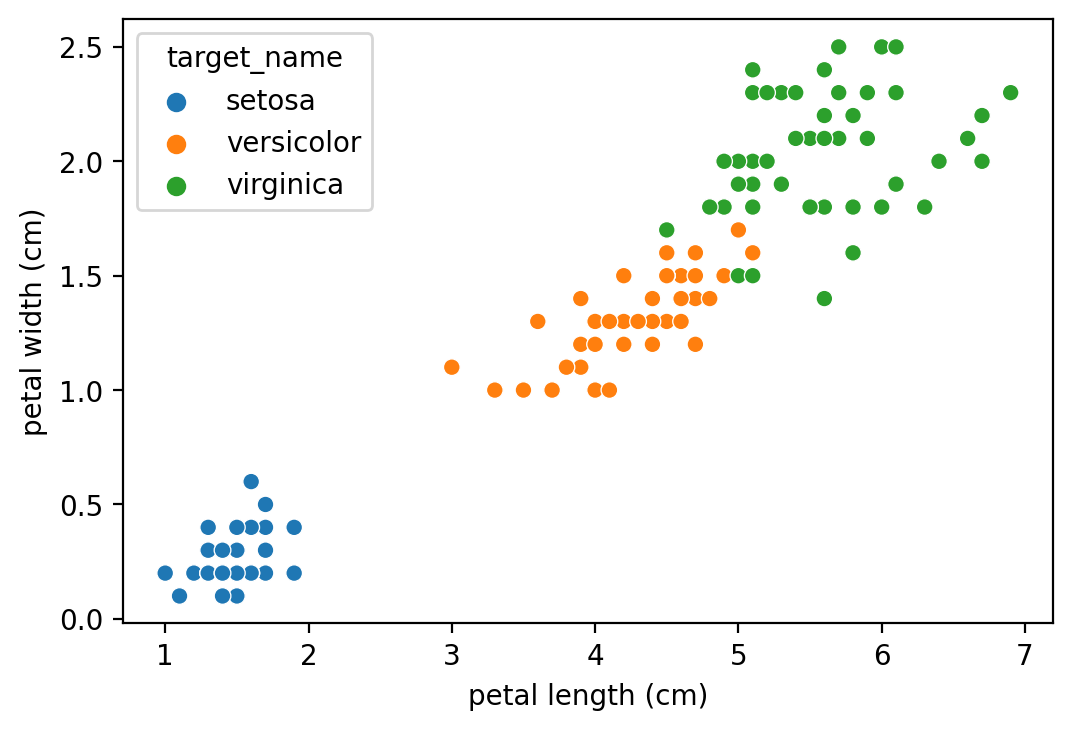

In [13]:
plt.rcParams["figure.dpi"] = 200
sns.scatterplot(data=df_iris, x="petal length (cm)", y="petal width (cm)", hue="target_name")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


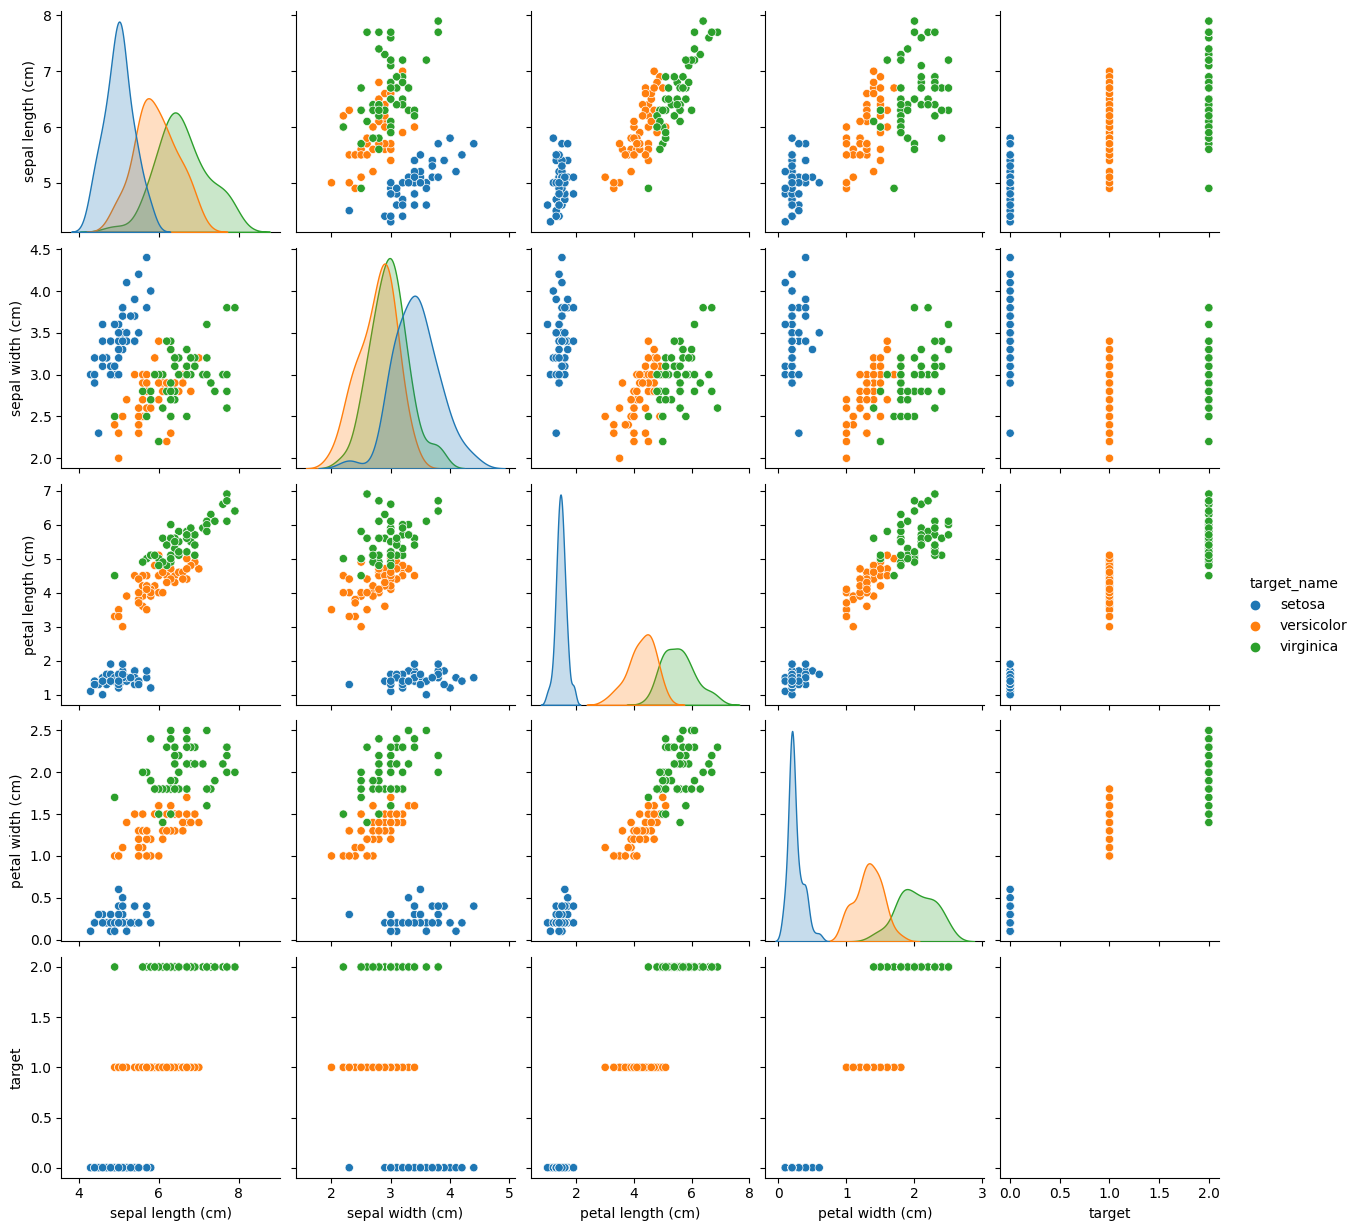

In [ ]:
plt.rcParams["figure.dpi"] = 100
sns.pairplot(df_iris, hue="target_name")

### Criação e treinamento do modelo

divisao de dados

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste , y_treino, y_teste = train_test_split(data_iris.data, data_iris.target, test_size=0.2)

In [ ]:
print("Treino: ",len(x_treino))
print("Teste: ", len(x_teste))

Treino:  120
Teste:  30


##Criação  do Meodo


In [ ]:
from sklearn import tree

In [ ]:
modelo = tree.DecisionTreeClassifier()
modelo = modelo.fit(x_treino, y_treino)

In [ ]:
##Predição dos dados  de teste(Prova)

In [ ]:
y_predicao = modelo.predict(x_teste)
y_predicao

array([0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 1, 0])

##avaliação do modelo

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_teste, y_predicao, target_names=target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.88      0.88         8
   virginica       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30

